IMPORT NUMPY, PANDAS, MATPLOTLIB 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

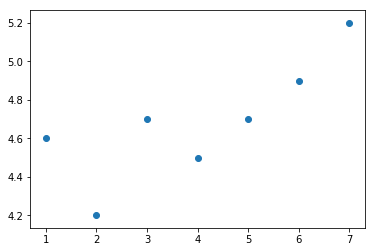

In [105]:
x1 = np.array([1, 2, 3, 4, 5, 6, 7])
y1 = np.array([4.6, 4.2, 4.7, 4.5, 4.7, 4.9, 5.2])
plt.scatter(x1, y1)
plt.show

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
clf = LinearRegression()
x1 = x1.reshape((7, 1))
y1 = y1.reshape((7, 1))

In [108]:
clf.fit(x1, y1)
x2 = np.array([1.5, 4.4, 7.1, 3.2])
clf.coef_, clf.intercept_

(array([[0.11428571]]), array([4.22857143]))

In [109]:
y_pred = clf.predict(x2.reshape((x2.shape[0], 1)))

<function matplotlib.pyplot.show(*args, **kw)>

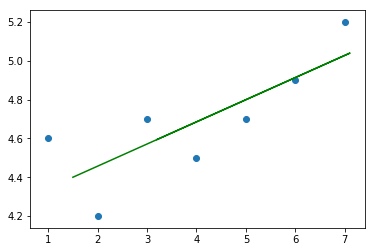

In [110]:
plt.plot(x2, y_pred, c='g')
plt.scatter(x1, y1)
plt.show

Now We'll try Linear Regression on Datasets with Multiple Features

In [111]:
from sklearn import datasets
boston = datasets.load_boston()

Observe the feature Names in the Datasets and the shapes of the data and traget values

In [112]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [113]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [114]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [115]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


We'll now split the data into training and testing

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 1)

In [117]:
x_train.shape, y_train.shape, y_test.shape, x_test.shape

((379, 13), (379,), (127,), (127, 13))

In [118]:
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [119]:
cls = LinearRegression()
cls.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
cls.coef_, cls.intercept_

(array([[-1.13256952e-01,  5.70869807e-02,  3.87621062e-02,
          2.43279795e+00, -2.12706290e+01,  2.86930027e+00,
          7.02105327e-03, -1.47118312e+00,  3.05187368e-01,
         -1.06649888e-02, -9.97404179e-01,  6.39833822e-03,
         -5.58425480e-01]]), array([45.23641585]))

In [121]:
cls.score(x_test, y_test)

0.7790257749137293

Now we'll see what happens when we scale the data -

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [123]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train) 
x_test_scaled = scale.transform(x_test)

On Scaling the data, the variance becomes 1 and the mean becomes zero

In [124]:
df_scale = pd.DataFrame(x_train_scaled)
df_scale.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,-5.346061e-17,-7.235490e-17,2.740405e-15,-1.611142e-17,-3.331255e-15,5.069237e-15,2.502835e-15,-2.938503e-17,-1.652152e-16,4.569783e-17,2.225309e-14,6.262800e-15,-8.105507e-16
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.031213e-01,-4.910617e-01,-1.567085e+00,-2.984635e-01,-1.436849e+00,-3.925267e+00,-2.222142e+00,-1.261847e+00,-9.773068e-01,-1.289036e+00,-2.748566e+00,-4.000567e+00,-1.549137e+00
25%,-3.948766e-01,-4.910617e-01,-8.687452e-01,-2.984635e-01,-9.056987e-01,-5.545832e-01,-8.393110e-01,-8.100591e-01,-6.333892e-01,-7.573090e-01,-5.041135e-01,1.991451e-01,-7.978046e-01
50%,-3.775928e-01,-4.910617e-01,-2.228356e-01,-2.984635e-01,-1.365933e-01,-1.219587e-01,3.700019e-01,-2.373698e-01,-5.187500e-01,-4.500892e-01,2.907968e-01,3.769991e-01,-1.335635e-01
75%,-1.684329e-02,2.654927e-01,1.001990e+00,-2.984635e-01,5.942692e-01,5.175098e-01,8.958671e-01,6.012837e-01,1.659395e+00,1.540932e+00,8.051504e-01,4.237116e-01,5.804438e-01
max,9.104066e+00,3.771217e+00,2.405951e+00,3.350493e+00,2.693374e+00,3.676980e+00,1.106567e+00,3.887417e+00,1.659395e+00,1.806795e+00,1.646820e+00,4.313108e-01,3.460665e+00


Implementing Gradient Descent for MultiVariable-Linear Regression

In [125]:
import math

We'll first define the Cost function. For Linear Regression, we'll be using Mean-Squared Error.

y : Predicted values

x : data

m : feature Coefficients

In [126]:
def cost(x, y, m):
    return ((y - np.dot(x, m)) ** 2).mean()

This is Mini-batch gradient descent implementation

In [127]:
def step_gradient(x, y, learning_rate, m, batch_size):
    k = x.shape[0]
    n = x.shape[1]
    num_batches = math.ceil(k/batch_size)
    
    for b in range(num_batches):
        start = b * batch_size 
        end = min((b + 1) * batch_size, k)
        slope_m = np.zeros((n, 1))
        for j in range(n):
            for i in range(start, end, 1):
                y_pred_i = np.dot(x[i], m)[0]
                y_i = y[i][0]
                slope_m[j][0] += (2/k)*x[i][j]*(y_pred_i - y_i)
        m = m - learning_rate * slope_m
    return m

In [128]:
def gradient_descent(x, y, learning_rate = 0.1, num_iter = 100, batch_size = 32):
    m = np.random.random((x.shape[1], 1))
    print("Start : ", cost(x, y, m))
    for i in range(num_iter):
        m = step_gradient(x, y, learning_rate, m, batch_size)
        if (i % (num_iter//10) == 0):
            print(i, " : ", cost(x, y, m))
    print("End : ", cost(x, y, m))
    return m

In [129]:
def run(x, y):
    learning_rate = 0.1
    num_iter = 2000
    m = gradient_descent(x, y, learning_rate, num_iter)
    return m

In [130]:
boston = datasets.load_boston()
x = preprocessing.scale(boston.data)
x = np.c_[x, np.ones((x.shape[0], 1))]
y = boston.target.reshape((x.shape[0], 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [131]:
m = run(x_train, y_train)

Start :  589.5501380460018
0  :  368.6840927273865
200  :  22.490800466985103
400  :  22.485409009071088
600  :  22.48538463926622
800  :  22.48538699642393
1000  :  22.48538727049559
1200  :  22.48538729758303
1400  :  22.485387300222325
1600  :  22.485387300479136
1800  :  22.485387300504122
End :  22.485387300506552


In [134]:
def score(y, y_pred):
    u = ((y - y_pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [136]:
y_predicted = np.dot(x_train, m)
score(y_train, y_predicted)

0.7167124807465957